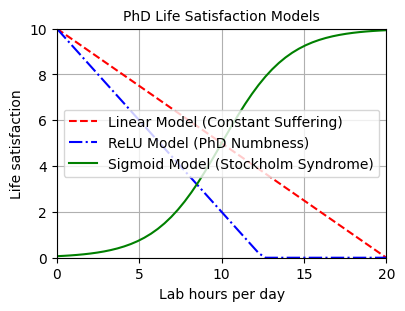

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Define models
class LinearPhDModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # y = wx + b

    def forward(self, x):
        return self.linear(x)

class PhDCopingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        self.activation = nn.ReLU()  # Numbness effect

    def forward(self, x):
        return self.activation(self.linear(x))

class StockholmSyndromeModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        self.activation = nn.Sigmoid()  # Acceptance of suffering

    def forward(self, x):
        return self.activation(self.linear(x)) * 10  # Max happiness = 10

# Generate workload data (hours in lab per day)
workload = torch.linspace(0, 20, 50).reshape(-1, 1)

# Instantiate models
linear_model = LinearPhDModel()
coping_model = PhDCopingModel()
stockholm_model = StockholmSyndromeModel()

# Manually setting weights for better visualization
linear_model.linear.weight.data.fill_(-0.5)
linear_model.linear.bias.data.fill_(10)

coping_model.linear.weight.data.fill_(-0.8)
coping_model.linear.bias.data.fill_(10)

stockholm_model.linear.weight.data.fill_(0.5)
stockholm_model.linear.bias.data.fill_(-5)

# Get predictions
linear_satisfaction = linear_model(workload).detach().numpy()
coping_satisfaction = coping_model(workload).detach().numpy()
stockholm_satisfaction = stockholm_model(workload).detach().numpy()

# Plot
fig, ax = plt.subplots(figsize=(4,3), layout='constrained')
plt.plot(workload, linear_satisfaction, label="Linear Model (Constant Suffering)", linestyle="--", color="red")
plt.plot(workload, coping_satisfaction, label="ReLU Model (PhD Numbness)", linestyle="-.", color="blue")
plt.plot(workload, stockholm_satisfaction, label="Sigmoid Model (Stockholm Syndrome)", linestyle="-", color="green")

plt.xlabel("Lab hours per day")
plt.xlim(0,20)
plt.ylim(0,10)
plt.ylabel("Life satisfaction")
plt.title("PhD Life Satisfaction Models", fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

fig.savefig('plot1', transparent=True)

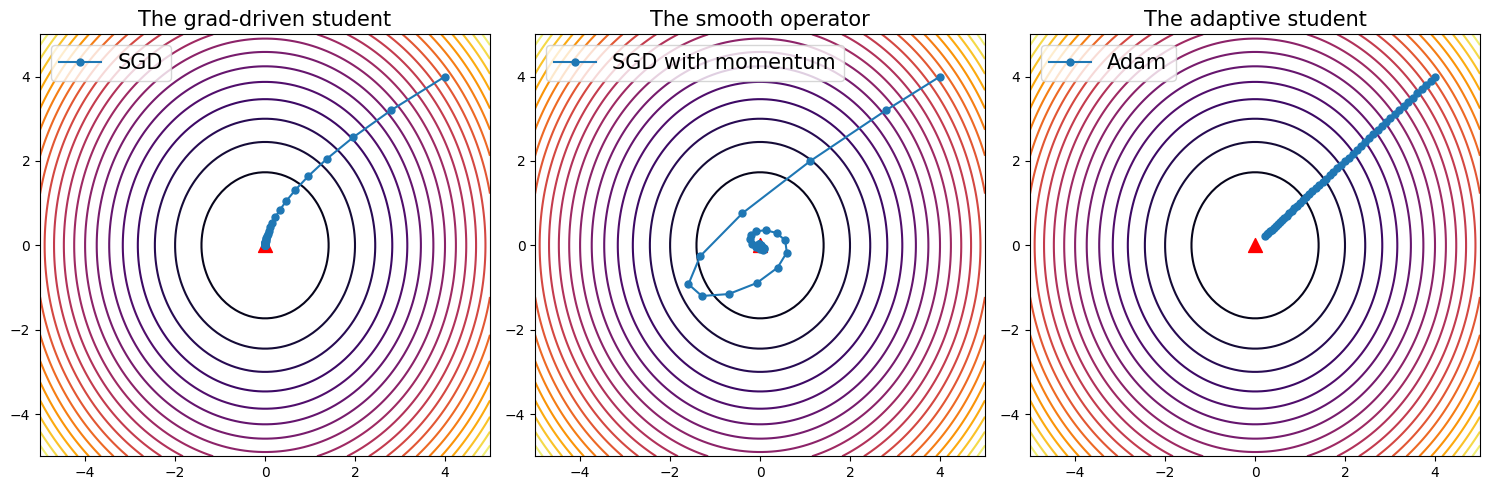

In [3]:
import torch.optim as optim

def loss_surface(x, y):
    return 1.5*x**2 + y**2  # Simple paraboloid (quadratic)

# Gradient of the loss function (derivative)
def grad_loss(x, y):
    return np.array([3*x, 2*y])  # Gradient of the quadratic function

# PhD students (optimizers) trying to minimize the loss

# Set initial positions for each optimizer (students)
initial_position = np.array([4.0, 4.0])

# Hyperparameters
learning_rate = 0.1
momentum = 0.7
num_iterations = 50

# Prepare the plot
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_surface(X, Y)

# Function to plot the optimization path
def plot_optimizer_path(optimizer_name, path, ax):
    ax.contour(X, Y, Z, 20, cmap='inferno')
    ax.plot(path[:, 0], path[:, 1], marker='o', label=optimizer_name, markersize=5)
    ax.scatter([0],[0], marker='^', color='red', s=100)
    ax.legend(fontsize='15')

# Optimization using different optimizers

# SGD: The student who just takes the gradient direction
def sgd_optimizer():
    position = initial_position.copy()
    path = [position]
    for _ in range(num_iterations):
        grad = grad_loss(position[0], position[1])
        position = position - learning_rate * grad  # SGD update rule
        path.append(position)
    return np.array(path)

# SGD with Momentum: The student who takes their previous step into account
def sgd_momentum_optimizer():
    position = initial_position.copy()
    velocity = np.zeros_like(position)
    path = [position]
    for _ in range(num_iterations):
        grad = grad_loss(position[0], position[1])
        velocity = momentum * velocity + learning_rate * grad  # Momentum update
        position = position - velocity
        path.append(position)
    return np.array(path)

# Adam: The student who adjusts their learning rate based on past experiences
def adam_optimizer():
    position = initial_position.copy()
    m = np.zeros_like(position)
    v = np.zeros_like(position)
    t = 0
    path = [position]
    for _ in range(num_iterations):
        t += 1
        grad = grad_loss(position[0], position[1])
        m = 0.9 * m + 0.1 * grad  # First moment (mean of gradients)
        v = 0.999 * v + 0.001 * (grad ** 2)  # Second moment (variance of gradients)
        m_hat = m / (1 - 0.9 ** t)  # Bias correction
        v_hat = v / (1 - 0.999 ** t)  # Bias correction
        position = position - learning_rate * m_hat / (np.sqrt(v_hat) + 1e-8)  # Adam update rule
        path.append(position)
    return np.array(path)

# RMSprop: The student who adapts their learning rate based on squared gradients
def rmsprop_optimizer():
    position = initial_position.copy()
    cache = np.zeros_like(position)
    path = [position]
    for _ in range(num_iterations):
        grad = grad_loss(position[0], position[1])
        cache = 0.9 * cache + 0.1 * (grad ** 2)  # Running average of squared gradients
        position = position - learning_rate * grad / (np.sqrt(cache) + 1e-8)  # RMSprop update
        path.append(position)
    return np.array(path)

# Create a figure and subplots for different optimizers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot paths of the different optimizers
plot_optimizer_path("SGD", sgd_optimizer(), axes[0])
axes[0].set_title("The grad-driven student", fontsize='15')
plot_optimizer_path("SGD with momentum", sgd_momentum_optimizer(), axes[1])
axes[1].set_title("The smooth operator", fontsize='15')
plot_optimizer_path("Adam", adam_optimizer(), axes[2])
axes[2].set_title("The adaptive student", fontsize='15')
#plot_optimizer_path("RMSprop", rmsprop_optimizer(), axes[3])
#axes[3].set_title("RMSprop: the cautious student", fontsize='15')

# Show the plot
plt.tight_layout()
plt.show()
fig.savefig('plot2', transparent=True)